到目前为止，本书的统计推断中所介绍的方法都是通常所知的参数方法（parametric method）。

这些方法通常始于假定总体的概率分布服从正态分布，基于这个假定，统计学家可以得到用于推断一个或多个总体参数（例如
总体均值 $\mu$、总体标准差 $\sigma$）的抽样分布。

例如，在第9章，我们介绍了假定总体服从正态概率分布，其参数和未知情况下对总体均值进行统计推断的方法。用样本标准差 $s$ 来估计总体标准差 $\sigma$，对总体均值进行推断的统计量服从 $t$ 分布。

因此，对正态总体均值可以用分布确定置信区间和进行检验。

在本章中，我们将介绍用于对总体进行推断的非参数方法（nonparametric method）。

非参数方法对总体概率分布形式的假定没有要求，因此非参数方法也被称为无分布方法（distribution-free method）

绝大多数的参数统计方法要求定量数据，而非参数方法则允许定类数据进行推断。

用于非参数方法的计算一般与定类数据有关。即使数据是定量数据，为进行非参数检验，我们也要将其转化为定类数据。

在本章，我们将演示如何用二项分布对两类数据以及总体中位数进行推断。

并演示如何用秩-顺序数据对两个或多个总体进行非参数检验。用秩-顺序数据对两个变量计算等级相关系数。

# 符号检验

符号检验（sign test）是假设检验中一种多用途的非参数方法，利用 $p=0.5$ 的二项分布作为抽样分布。

它对总体分布没有假定的要求。在本节我们将介绍符号检验的两个应用：一个是关于总体中位数的检验；另一个是两个匹配总体之差的检验。

现在我们来进行一个假设检验：
- $H_0: 中位数 = 450$
- $H_{\alpha}: 中位数 \neq 450$

利用符号检验，可以将其转化为：
- $H_0: p = 0.5$
- $H_{\alpha}: p \neq 0.5$

In [3]:
import pandas as pd

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

In [4]:
lawler = pd.read_csv(DATA / 'Lawler.csv')
lawler['Sign'] = lawler['Sales'].apply(lambda x: 1 if x>= 450 else 0)
lawler

,Shop,Sales,Sign
0,56,485,1
1,19,562,1
2,36,415,0
3,128,860,1
4,12,426,0
5,63,474,1
6,39,662,1
7,84,380,0
8,102,515,1
9,44,721,1


r	p(r)
0	0.0009765625
1	0.009765625000000002
2	0.04394531250000004
3	0.1171875
4	0.2050781249999999
5	0.24609375000000003
6	0.2050781249999999
7	0.11718749999999999
8	0.04394531249999997
9	0.009765625000000002
10	0.0009765625
mean = 5.0
variance = 2.5


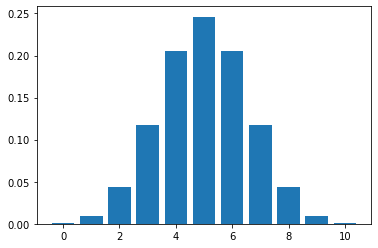

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# setting the values of n and p
n = 10
p = 0.5
# defining the list of r values
r_values = list(range(n + 1))
# obtaining the mean and variance 
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

plt.bar(r_values, dist)
plt.show()

In [6]:
prob = 0
signcount = lawler['Sign'].sum()
for i in range(signcount ,n + 1):
    prob = prob + dist[i]
round(prob,4)

0.1719

由于我们已知，大于估计均值的个数是 7 个，通过查阅 $n=10$、$p=0.5$ 的二项分布概率，计算出大于等于 7 的概率 $p = 0.1719$，由于是双侧检验，因此 P 值还要乘以 2，由于 $p-> \alpha = 0.05$，所以我们不能拒绝零假设。

刚才的这个例子，样本容量少于 20 个，如果样本容量超过 20 个，我们可以根据二项分布的正态分布近似来计算 $p-$ 值。

In [17]:
homeSales = pd.read_csv(DATA / 'HomeSales.csv')
homeSales['Sales Price'] = homeSales['Sales Price'].replace('[\$,]', '', regex=True).astype(int)

homeSales['Sign'] = homeSales['Sales Price'].apply(lambda x: 1 if x> 236000 else 0)
homeSales.head()

,Sales Price,Sign
0,245500,1
1,221600,0
2,214000,0
3,171200,0
4,278100,1


现在我们来进行一个假设检验：
- $H_0: 中位数 \ge 236000$
- $H_{\alpha}: 中位数 < 236000$

利用符号检验，可以将其转化为：
- $H_0: p \ge 0.5$
- $H_{\alpha}: p < 0.5$

In [18]:
homeSales['Sign'].sum()

22

In [19]:
homeSales['Sign'].count()

61

当 $H_0: p = 0.5$ 且 $n > 20$ 时，二项分布的正态分布近似：
$$ \mu = 0.5 n$$
$$ \sigma = \sqrt{0.25n}$$

已知 $n = 60$，则
$$ \mu = 0.5 n = 0.5 \times 60 = 30$$
$$ \sigma = \sqrt{0.25n} = \sqrt{0.25 \times 60} = 3.873$$

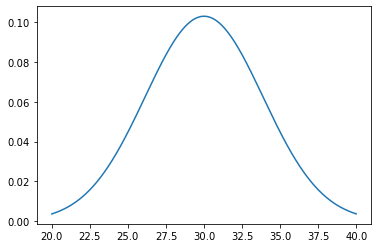

In [20]:
from scipy.stats import norm
import numpy as np
import statistics

x_axis = np.arange(20, 40, 0.01)

plt.plot(x_axis, norm.pdf(x_axis, 30, 3.873))
plt.show()

In [21]:
norm.cdf(22.5, 30, 3.873)

0.026404265147658285

由于 $\mu = 30$、$\sigma = 3.872$ 的正态分布中，$x\le 22.5$ 的 $p- = 0.026 < \alpha = 0.05$，因此我们可以拒绝零假设。

# 威尔科克森符号秩检验

在第10章中，我们介绍了匹配样本实验设计，n个实验单位中的每一个提供一对观测值，其中一个来自总体1，另一个来自总体2。该实验的参数检验要求数量型数据，而且假定配对观测值之差服从正态分布，则可以利用t分布对两个总体均值之差进行推断。

威尔科克森符号秩检验（Wilcoxon signed-rank test）是分析匹配样本实验数据的非参数方法。

检验使用数量型数据，但不要求假定配对观测值之差服从正态分布，只需要假定配对观测值之差具有对称分布。

即使两个总体的形态相同，关注点是确定两个总体的中位数是否有差异。用下面的例子来说明威尔科克森符号秩检验。

考虑某个制造企业正在尝试确定两种生产方法在完成任务时间上是否存在差异。使用匹配样本实验设计，随机选择11个工人的2次完成任务时间，1次使用方法A，1次使用方法B。

工人首先使用的生产方法是随机挑选的。两种方法的完成任务时间以及完成时间的差异数据如下面所示。

正的差异表明方法A需要更多的时间，而负的差异则表明方法B需要更多的时间。这些数据是否表明两种方法在完成任务时间上存在显著差异呢？如果我
们假设数据的差异具有对称分布，但不需要正态分布，可以应用威尔科克森符号秩检验。

In [22]:
matchedSample = pd.read_csv(DATA / 'MatchedSample.csv')
matchedSample

,Method A,Method B,Difference
0,10.2,9.5,0.7
1,9.6,9.8,-0.2
2,9.2,8.8,0.4
3,10.6,10.1,0.5
4,9.9,10.3,-0.4
5,10.2,9.3,0.9
6,10.6,10.5,0.1
7,10.0,10.0,0.0
8,11.2,10.6,0.6
9,10.7,10.2,0.5


In [23]:
import scipy.stats as stats

#perform the Wilcoxon-Signed Rank Test
stats.wilcoxon(matchedSample['Difference'], alternative = 'two-sided')

/Users/stephenyan/miniconda/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=5.5, pvalue=0.024744672046398936)

In [24]:
stats.wilcoxon(matchedSample['Method A'], matchedSample['Method B'], alternative = 'two-sided')

WilcoxonResult(statistic=6.0, pvalue=0.028314054945765665)

# 曼一惠特尼－威尔科克森检验

在第10章中，我们介绍了利用两个独立样本进行两个总体均值之差的假设检验方法，其中一个样本来自总体1，另一个来自总体2。参数检验要求数量型数据，且假定总体都服从正态分布。

当总体标准差 $\sigma_1$ 和 $\sigma_2$ 未知时，用样本标准差 $s_1$ 和 $s_2$ 作为 $\sigma_1$ 和 $\sigma_2$ 的估计量，并且利用 $t$ 分布对两个总体均值之差进行推断。

在本节我们介绍一种基于两个独立样本的两总体之间差异的非参数方法。非参数方法的优点是它既可以使用顺序型数据也可以使用数量型数据，而且不需要假定总体服从正态分布。

检验的形式由曼、惠特尼和威尔科克森联合提出，因而它被称为曼－惠特尼检验和威尔科克森秩和检验。这些检验是等价的，并且提供同样的结论。

在本节我们将这个非参数检验称为曼-惠特尼－威尔科克森检验（Mann-Whitney-Wilcoxon test，MWW）。我们以陈述原假设和备择假设的最一般形式开始MWW检验，假设如下。
- $H_0$：两个总体相同
- $H_{\alpha}$：两个总体不相同

In [25]:
thirdNational = pd.read_csv(DATA / 'ThirdNational.csv')
thirdNational

,Branch 1,Branch 2
0,1095,885.0
1,955,850.0
2,1200,915.0
3,1195,950.0
4,925,800.0
5,950,750.0
6,805,865.0
7,945,1000.0
8,875,1050.0
9,1055,935.0


In [26]:
import scipy.stats as stats

#perform the Mann-Whitney U test
stats.mannwhitneyu(thirdNational['Branch 1'].dropna(), thirdNational['Branch 2'].dropna(), alternative='two-sided')

MannwhitneyuResult(statistic=91.5, pvalue=0.04088870450160243)

# 克鲁斯卡尔-沃利斯检验

在本节我们将假设检验的非参数方法扩展到3个或3个以上总体的情形。当我们使用数量型数据并假定总体服从标准差相等的正态分布时，我们考虑第13章的参数检验。以每个总体的独立随机样本为依据，我们用 $F$ 分布来检验各总体之间的差异。

非参数的克鲁斯卡尔-沃利斯检验（Kruskal-Wallistest）的依据是对来自k个总体的k个独立随机样本的分析。这个方法既可使用顺序型数据，也可使用数量型数据，并且不需要假定总体服从正态分布。原假设和备择假设的一般形式如下。

- $H_0$：所有总体是相同的
- $H_{\alpha}$：并非所有总体都是相同的

如果 $H_0$ 被拒绝，我们将得出总体之间存在差异，与其他总体相比较，一个或多个总体提供较小或较大的数值。我们用下面的例子来阐述克鲁斯卡尔－沃利斯检验。

In [27]:
williams = pd.read_csv(DATA / 'Williams.csv')
williams

,College A,College B,College C
0,25,60.0,50
1,70,20.0,70
2,60,30.0,60
3,85,15.0,80
4,95,40.0,90
5,90,35.0,70
6,80,NaN,75


In [28]:
from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(williams['College A'].dropna(), williams['College B'].dropna(), williams['College C'].dropna())

KruskalResult(statistic=8.983874458874453, pvalue=0.011198927889247982)